In [128]:
# Read in libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

#  matploblib ve seaborn'un çağırılması.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Read in dataset
df_Ris = pd.read_csv('RISDataFLCI.csv', delimiter=";", encoding="ISO-8859-1", low_memory=False)
df_Ris.tail()

,Service Centre,Date of PQM entry,Document Number,Original Document (RIS) Number,Date of request,Reference 1,Reference 2,Internal reference,Dublicate Repair,Rpt Case,...,Spare Part 10,Spare Part Description 10,Factory Material 10,EXT/INT Indicator 10,Quantity 10,Return Part indicator 10,Material Description,Overfill Safety System,Drying Type,3rd load level
5662,2,03.04.2023,124305907,NaN,01.03.2023,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
5663,12,03.04.2023,124653403,NaN,20.03.2023,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
5664,12,03.04.2023,124322410,NaN,02.03.2023,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
5665,4,03.04.2023,124069640,NaN,20.02.2023,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
5666,12,03.04.2023,124366917,NaN,04.03.2023,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [5]:
# Read the Spare Part excluded list
df_excluded = pd.read_csv('excluded_list.csv', delimiter=";", encoding="ISO-8859-1", low_memory=False)
df_excluded.tail()

,Spare Part excluded list,Spare Part
85,Test strip-water hardness,Spare Part excluded
86,Travel,Spare Part excluded
87,"Valve inlet, outlet replaced",Spare Part excluded
88,VDE test,Spare Part excluded
89,Work units,Spare Part excluded


In [6]:
# Create a list for excluded spare parts
list_excluded = df_excluded['Spare Part excluded list'].to_list()

In [ ]:
# df.info()

In [7]:
# List of columns which we need for project...

keep_columns = [    'Document Number',
                    'Spare Part Description 10',
                    'Spare Part Description 9',
                    'Spare Part Description 8',
                    'Spare Part Description 7',
                    'Spare Part Description 6',
                    'Spare Part Description 5',
                    'Spare Part Description 4',
                    'Spare Part Description 3',
                    'Spare Part Description 2',
                    'Spare Part Description 1']

In [8]:
# List of columns which we need for project...

dummies = [    'Spare Part Description 10',
                'Spare Part Description 9',
                'Spare Part Description 8',
                'Spare Part Description 7',
                'Spare Part Description 6',
                'Spare Part Description 5',
                'Spare Part Description 4',
                'Spare Part Description 3',
                'Spare Part Description 2',
                'Spare Part Description 1']

In [9]:
# Create a new dataframe with necessary columns.

df_necessary = df_Ris[keep_columns]
df_necessary.tail()

,Document Number,Spare Part Description 10,Spare Part Description 9,Spare Part Description 8,Spare Part Description 7,Spare Part Description 6,Spare Part Description 5,Spare Part Description 4,Spare Part Description 3,Spare Part Description 2,Spare Part Description 1
5662,124305907,NaN,NaN,NaN,NaN,NaN,NaN,Labour Service Partner,Labour Service Partner,Start-up flat charge internal,Heat pump
5663,124653403,NaN,NaN,NaN,NaN,NaN,NaN,Labour Service Partner,Labour Service Partner,Start-up flat charge internal,Power module programmed
5664,124322410,NaN,NaN,NaN,NaN,NaN,Upper crockery basket,Labour Service Partner,Labour Service Partner,Start-up flat charge internal,Rack guide rail
5665,124069640,NaN,NaN,NaN,NaN,NaN,NaN,Labour Service Partner,Labour Service Partner,Start-up flat charge internal,Water inlet
5666,124366917,NaN,NaN,NaN,NaN,NaN,NaN,Start-up flat charge internal,Labour Service Partner,SMM programmed,Labour Service Partner


In [10]:
# Set null if the columns have the excluded spare parts (çıkartılacak şeyler sütunda varsa onları da NaN olarak yazsın)
for col in df_necessary.columns:
    for i in list_excluded:
        df_necessary.loc[df_necessary[col] == i, col] = np.NaN

C:\Users\YilmazSec\AppData\Local\Temp\ipykernel_12304\3105601383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_necessary.loc[df_necessary[col] == i, col] = np.NaN


In [ ]:
# df_necessary.info()

In [11]:
# Create a new dataframe with dummies

df_dummies = pd.get_dummies(df_necessary, columns = dummies)
# df_dummies.head()

In [12]:
df_dummies.head()

,Document Number,Spare Part Description 10_Sealing strip,Spare Part Description 9_Dispenser,Spare Part Description 9_LED-Light bar,Spare Part Description 9_Operating module,Spare Part Description 9_Panel-base,Spare Part Description 9_Power module programmed,Spare Part Description 9_SMM not programmed,Spare Part Description 8_Aquastop,Spare Part Description 8_Door-inner,...,Spare Part Description 1_Tube,Spare Part Description 1_Upper crockery basket,Spare Part Description 1_Valve,Spare Part Description 1_Valve-aquastop,Spare Part Description 1_Valve-outlet,Spare Part Description 1_Valve-regeneration,Spare Part Description 1_Water filter,Spare Part Description 1_Water inlet,Spare Part Description 1_Water softener,Spare Part Description 1_Wheel
0,A00002094205,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,479824013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1235458,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,RO16474416,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A00002123430,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Get the spare part names form column: 'Spare Part Description 1_Valve-regeneration' => 'Valve-regeneration'
last_word = []

for i in df_dummies.columns:
    if "Part" in i:
        l1 = i.split('Part ', 1)[1]
        l2 = l1.split('_', 1)[1]
        last_word.append(l2)

spare_parts = set(last_word)    # Delete dublicated vales in list

In [14]:
# save the spare parts as list
spare_parts_list = [] # <=
for i in spare_parts:
    spare_parts_list.append(i)

# spare_parts_list.append('Error Causing Part Description_Cover')

In [15]:
df_dummies.tail()

,Document Number,Spare Part Description 10_Sealing strip,Spare Part Description 9_Dispenser,Spare Part Description 9_LED-Light bar,Spare Part Description 9_Operating module,Spare Part Description 9_Panel-base,Spare Part Description 9_Power module programmed,Spare Part Description 9_SMM not programmed,Spare Part Description 8_Aquastop,Spare Part Description 8_Door-inner,...,Spare Part Description 1_Tube,Spare Part Description 1_Upper crockery basket,Spare Part Description 1_Valve,Spare Part Description 1_Valve-aquastop,Spare Part Description 1_Valve-outlet,Spare Part Description 1_Valve-regeneration,Spare Part Description 1_Water filter,Spare Part Description 1_Water inlet,Spare Part Description 1_Water softener,Spare Part Description 1_Wheel
5662,124305907,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5663,124653403,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5664,124322410,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5665,124069640,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5666,124366917,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Copy the df_dummies as new dataframe

df_spare_parts = df_dummies

In [ ]:
# df_spare_parts.head()

In [17]:
# Take spare part descriptions as list
spare_parts_column_list = []

for i in df_spare_parts.columns:
    if "Spare " in i:
        spare_parts_column_list.append(i)

In [18]:
# Spare Part Description 1_Water filter | 2_Water filter | 3_Water filter => Water filter
for col in df_spare_parts.columns:
    if '_' in col:
        for i in spare_parts_list:
            if i == col.split('_', 1)[1]:
                df_spare_parts.loc[df_spare_parts[col] == 1, i] = 1

C:\Users\YilmazSec\AppData\Local\Temp\ipykernel_12304\303060072.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_spare_parts.loc[df_spare_parts[col] == 1, i] = 1
C:\Users\YilmazSec\AppData\Local\Temp\ipykernel_12304\303060072.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_spare_parts.loc[df_spare_parts[col] == 1, i] = 1
C:\Users\YilmazSec\AppData\Local\Temp\ipykernel_12304\303060072.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

In [19]:
# We do not need Spare Part Description 1_Water filter columns anymore
df_spare_parts = df_spare_parts.drop(spare_parts_column_list, axis=1)


In [20]:
df_spare_parts.head()

,Document Number,Sealing strip,Dispenser,LED-Light bar,Operating module,Panel-base,Power module programmed,SMM not programmed,Aquastop,Door-inner,...,Rail,Spray arm,Thread bolt,Water filter,Filter-micro,Frame,Hose-sump,Lamp,Spare part,Supplemental
0,A00002094205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,479824013,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1235458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RO16474416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A00002123430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_spare_parts.fillna(0)

,Document Number,Sealing strip,Dispenser,LED-Light bar,Operating module,Panel-base,Power module programmed,SMM not programmed,Aquastop,Door-inner,...,Rail,Spray arm,Thread bolt,Water filter,Filter-micro,Frame,Hose-sump,Lamp,Spare part,Supplemental
0,A00002094205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,479824013,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1235458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,RO16474416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A00002123430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,124305907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5663,124653403,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5664,124322410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5665,124069640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# cor_ErrorPart_SparePart = df_spare_parts.corr()

In [ ]:
# cor_ErrorPart_SparePart.to_excel("cor_ErrorPart_SparePart.xlsx")

In [ ]:
# df_spare_parts.to_excel("df_spare_parts.xlsx")

In [ ]:
# cor2 = df_spare_parts.corr()

belli tekrar altındakileri çıkarılacak listeye eklesin.

In [22]:
# For regregession we need integer. So nan => 0
for i in df_spare_parts.columns:
    if i != "Document Number":
        df_spare_parts[i] = df_spare_parts[i].replace(np.nan, 0).astype('int')

#Convert all data types to integer
# df_spare_parts = df_spare_parts.astype('int')

In [23]:
df_spare_parts.head()

,Document Number,Sealing strip,Dispenser,LED-Light bar,Operating module,Panel-base,Power module programmed,SMM not programmed,Aquastop,Door-inner,...,Rail,Spray arm,Thread bolt,Water filter,Filter-micro,Frame,Hose-sump,Lamp,Spare part,Supplemental
0,A00002094205,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,479824013,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1235458,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,RO16474416,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A00002123430,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


for i in np.isnan(df_spare_parts).sum():
    print(i)

In [ ]:
# df_spare_parts.to_excel("df_spare_parts.xlsx")

In [24]:
df_spare_parts_columns = df_spare_parts.columns
# df_spare_parts_columns.drop('Document Number')

## Buraya kadar "Spare Parts" kaldı ve değişen parçalar 1 olarak belirtildi.

In [25]:
df_new = pd.DataFrame(columns=df_spare_parts.columns, index = df_spare_parts.columns)
df_new = df_new.fillna(0)

for column in df_spare_parts.columns:
    for index, value in enumerate(df_spare_parts[column]):
        if value == 1:
            for i in df_spare_parts.columns:
                if df_spare_parts.loc[index, i] == 1:
                    df_new.loc[column, i] += 1


In [ ]:
df_new.tail()

In [26]:
for column in df_spare_parts.columns:
    for index, value in enumerate(df_spare_parts[column]):
        if value == 1:
            for i in df_spare_parts.columns:
                if df_spare_parts.loc[index, i] == 1:
                    df_new.loc[column, i] += 1

In [ ]:
# df_new.loc[7, 'Power module programmed'] = 1

In [ ]:
# df_new.loc[7, 'Power module programmed']

In [ ]:
# df_new.loc[7, 'Power module programmed'] += 1

In [27]:
# Max count is equal to exhanged part.
df_new['Max'] = df_new[:].max(axis=1)

C:\Users\YilmazSec\AppData\Local\Temp\ipykernel_12304\3833745316.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Max'] = df_new[:].max(axis=1)


In [28]:
df_new.head()

,Document Number,Sealing strip,Dispenser,LED-Light bar,Operating module,Panel-base,Power module programmed,SMM not programmed,Aquastop,Door-inner,...,Spray arm,Thread bolt,Water filter,Filter-micro,Frame,Hose-sump,Lamp,Spare part,Supplemental,Max
Document Number,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sealing strip,0,2,0,2,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,2
Dispenser,0,0,922,0,6,4,84,2,2,10,...,2,0,0,0,0,0,0,0,0,922
LED-Light bar,0,2,0,2,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,2
Operating module,0,0,6,0,560,0,302,12,4,2,...,0,0,0,0,0,0,0,0,0,560


In [102]:
df_new_per = pd.DataFrame(columns=df_spare_parts.columns, index = df_spare_parts.columns)
# df_new.insert(0, "Spare Parts", df_spare_parts.columns, index = 0)
df_new_per = df_new_per.fillna(0)


In [103]:
for column in df_new.columns:
    if column != "Max":
        df_new_per[column] = df_new[column] / df_new["Max"]
    else:
        df_new_per['Max'] = df_new['Max']


C:\Users\YilmazSec\AppData\Local\Temp\ipykernel_12304\2315414548.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_per['Max'] = df_new['Max']


In [104]:
df_new_per = df_new_per.sort_values(by=['Max'], ascending=False).head(10)
cols = list(df_new_per)
cols = [cols[-1]] + cols[:-1]
df_new_per = df_new_per[cols]

In [105]:
df_new_per.head(10)

,Max,Document Number,Sealing strip,Dispenser,LED-Light bar,Operating module,Panel-base,Power module programmed,SMM not programmed,Aquastop,...,Rail,Spray arm,Thread bolt,Water filter,Filter-micro,Frame,Hose-sump,Lamp,Spare part,Supplemental
Heat pump,2166,0.0,0.0,0.013850,0.0,0.010157,0.000923,0.166205,0.000000,0.005540,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000923,0.0
Power module programmed,1906,0.0,0.0,0.044071,0.0,0.158447,0.001049,1.000000,0.012592,0.013641,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Dispenser,922,0.0,0.0,1.000000,0.0,0.006508,0.004338,0.091106,0.002169,0.002169,...,0.000000,0.002169,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Flow-through sensor,660,0.0,0.0,0.009091,0.0,0.012121,0.003030,0.124242,0.000000,0.060606,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Pump-drain,618,0.0,0.0,0.003236,0.0,0.012945,0.003236,0.126214,0.000000,0.003236,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Aquastop,572,0.0,0.0,0.003497,0.0,0.006993,0.000000,0.045455,0.000000,1.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Operating module,560,0.0,0.0,0.010714,0.0,1.000000,0.000000,0.539286,0.021429,0.007143,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Valve,456,0.0,0.0,0.008772,0.0,0.004386,0.000000,0.105263,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Lower crockery basket,356,0.0,0.0,0.000000,0.0,0.000000,0.005618,0.005618,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Panel-facia,338,0.0,0.0,0.005917,0.0,0.041420,0.000000,0.011834,0.000000,0.000000,...,0.005917,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


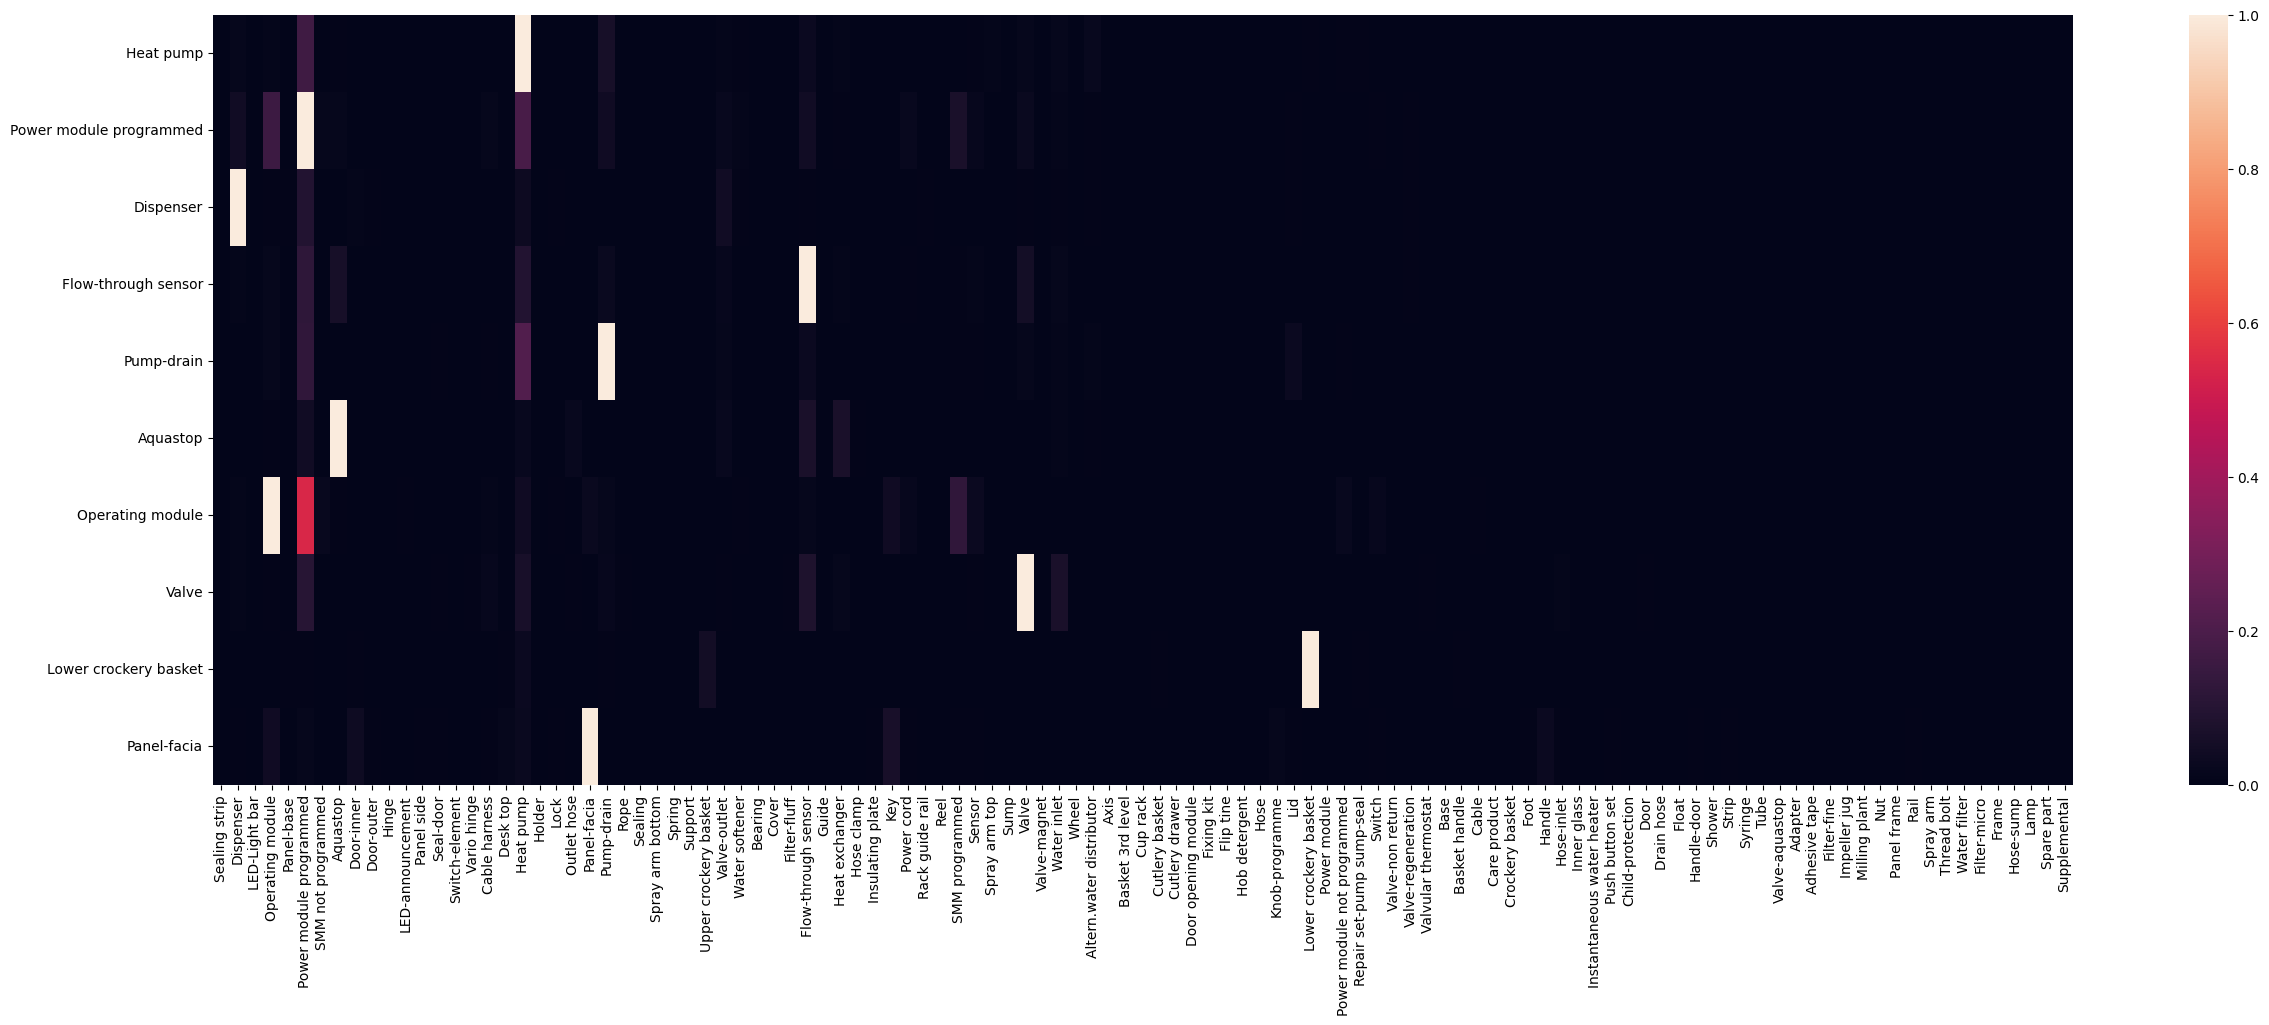

In [132]:
plt.figure(figsize = (30,10))
sns.heatmap(df_new_per.drop(columns=['Max', 'Document Number']))
plt.savefig('Top10HeatMap.png', dpi=400)

# Define the number of top values to return
n = 4

# Iterate over each row of the DataFrame
for index, row in df_new_per.drop(columns=['Max', 'Document Number']).iterrows():
    # Get the top-n highest values in the row
    top_n = row.nlargest(n)
    # Print the names of the top-n highest-value columns
    print(f'Top-{n} columns in row {index}: {list(top_n.index)}')

In [134]:
df_new_per.to_excel('Top10.xlsx', sheet_name='Overall')

In [135]:
# Define the number of top values to return
n = 4
import xlsxwriter
# Iterate over each row of the DataFrame
for index, row in df_new_per.drop(columns=['Max', 'Document Number']).iterrows():
    # Get the top-n highest values in the row
    top_n = row.nlargest(n)
    # Print the names of the top-n highest-value columns
    df_excel = pd.DataFrame({'Exchange Part' : list(top_n.index), 'Rate' : list(top_n)})

    with pd.ExcelWriter("Top10.xlsx", mode='a', engine="openpyxl") as writer:
        df_excel.to_excel(writer, sheet_name=index, index=False)



In [37]:
df_new_per.max(axis=1)

Heat pump                  2166.0
Power module programmed    1906.0
Dispenser                   922.0
Flow-through sensor         660.0
Pump-drain                  618.0
Aquastop                    572.0
Operating module            560.0
Valve                       456.0
Lower crockery basket       356.0
Panel-facia                 338.0
dtype: float64

In [ ]:
df_new.to_excel("df_new.xlsx")

In [ ]:
df_new_per.to_excel("df_new_per.xlsx")

## Results

### 1. Top Sparet Parts by Count
It shows that how many times exchanged each spare parts 

In [85]:
df_top_exchanged = df_new['Max'].sort_values(ascending=False).to_frame().head(10)

In [86]:
df_top_exchanged

,Max
Heat pump,2166
Power module programmed,1906
Dispenser,922
Flow-through sensor,660
Pump-drain,618
Aquastop,572
Operating module,560
Valve,456
Lower crockery basket,356
Panel-facia,338


In [ ]:
df_top_exchanged.to_excel("df_top_exchanged.xlsx")

### 2. Top 3 of Exhanged Parts
It shows that Which parts are the most exchnaged parts with the defined(exchanged) parts => (Index) 

In [ ]:
df_new_per.reset_index()
df_new_per = df_new_per.drop(columns= ['Max', ])

c = ['the most', '1st Max','2nd Max','3rd Max']
df_new_top_3 = (df_new_per
        .apply(lambda x: pd.Series(x.nlargest(4).index, index=c), axis=1)
        .reset_index())

top3 = pd.DataFrame(np.sort(df_new_per, axis=1)[:, ::-1][:,:4], columns=c)

In [ ]:
top3

In [ ]:
df_new_top_3

In [ ]:
new_df_top_3=pd.merge(df_new_top_3, top3, left_index=True, right_index=True)


In [ ]:
new_df_top_3

In [ ]:
new_df_top_3 = new_df_top_3.iloc[:,[0,1,5,2,6,3,7,4,8]]
new_df_top_3

In [ ]:
new_df_top_3.to_excel("new_df_top_3.xlsx")